In [1]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
# Set Seaborn style for better visualization
sns.set(style='darkgrid')

In [2]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define class names for better understanding of the output
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

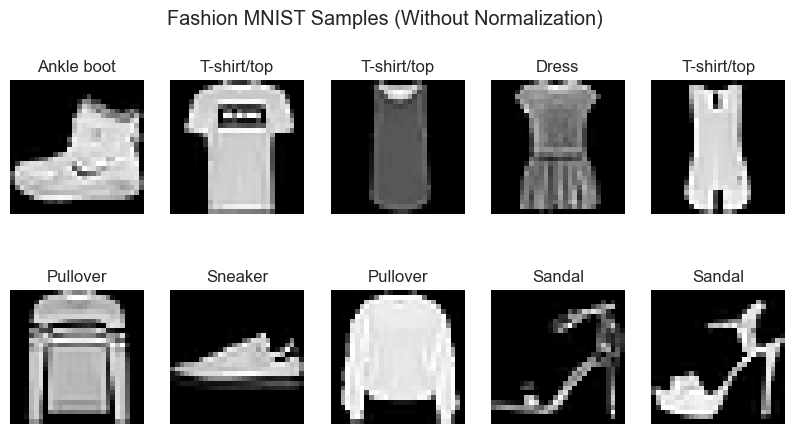

In [3]:
# Display some sample images without normalization
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.suptitle('Fashion MNIST Samples (Without Normalization)')
plt.show()

# Training SLP Model without Normalization

In [4]:
# Create a Simple Perceptron Model
model1 = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D array
    Dense(64, activation='relu'),  # First hidden layer
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model with SGD optimizer (instead of Adam)
model1.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\Global\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1053 - loss: 246.5703 - val_accuracy: 0.1195 - val_loss: 2.2628
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.1142 - loss: 2.2682 - val_accuracy: 0.1308 - val_loss: 2.2341
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1057 - loss: 2.3142 - val_accuracy: 0.1002 - val_loss: 2.3025
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0993 - loss: 2.3001 - val_accuracy: 0.1130 - val_loss: 2.2726
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1226 - loss: 2.2551 - val_accuracy: 0.1321 - val_loss: 2.2419
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1288 - loss: 2.2394 - val_accuracy: 0.1501 - val_loss: 2.1854
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1381 - loss: 2.2305 - val_accuracy: 0.1489 - val_loss: 2.1822
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1450 - loss: 2.1961 

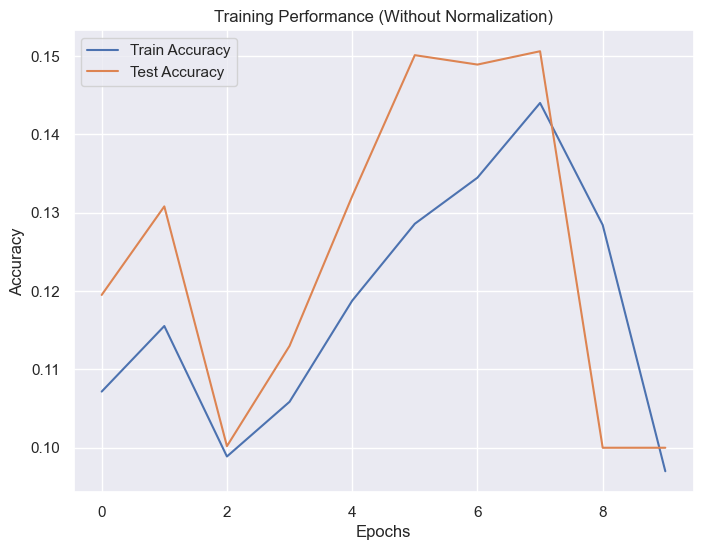

In [5]:
# Train the model
history1 = model1.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Plot training history
plt.figure(figsize=(8, 6))
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Performance (Without Normalization)')
plt.legend()
plt.show()

# Training SLP Model with Normalization

In [6]:
# Normalize the dataset (scale pixel values between 0 and 1)
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

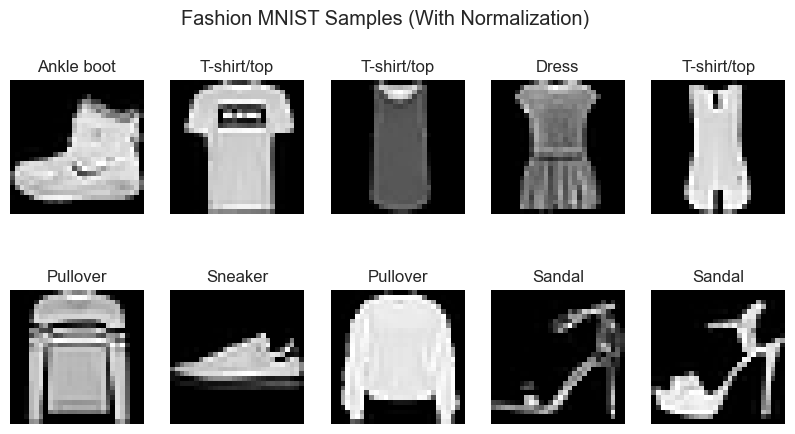

In [7]:
# Display some sample images after normalization
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images_norm[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.suptitle('Fashion MNIST Samples (With Normalization)')
plt.show()

In [8]:
# Create a Simple Perceptron Model with Normalization
model2 = Sequential([
    Flatten(input_shape=(28, 28)),  
    Dense(64, activation='relu'),  
    Dense(10, activation='softmax')  
])

# Compile the model with RMSprop optimizer
model2.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7757 - loss: 0.6528 - val_accuracy: 0.8422 - val_loss: 0.4315
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8551 - loss: 0.3991 - val_accuracy: 0.8541 - val_loss: 0.4156
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8719 - loss: 0.3569 - val_accuracy: 0.8681 - val_loss: 0.3811
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8794 - loss: 0.3370 - val_accuracy: 0.8625 - val_loss: 0.3972
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8850 - loss: 0.3207 - val_accuracy: 0.8707 - val_loss: 0.3831
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8908 - loss: 0.3042 - val_accuracy: 0.8603 - val_loss: 0.3895
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8938 - loss: 0.2953 - val_accuracy: 0.8767 - val_loss: 0.3658
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8977 - loss: 0.2884 - 

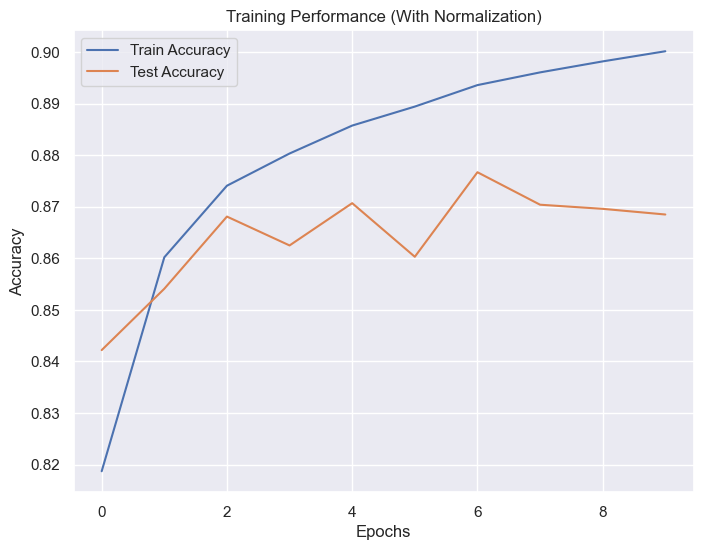

In [9]:
# Train the model
history2 = model2.fit(train_images_norm, train_labels, epochs=10, validation_data=(test_images_norm, test_labels))

# Plot training history
plt.figure(figsize=(8, 6))
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Performance (With Normalization)')
plt.legend()
plt.show()

In [10]:
# Model Evaluation
loss1, acc1 = model1.evaluate(test_images, test_labels)
print(f'Without Normalization - Test Accuracy: {acc1 * 100:.2f}%')

loss2, acc2 = model2.evaluate(test_images_norm, test_labels)
print(f'With Normalization - Test Accuracy: {acc2 * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0998 - loss: 2.3025
Without Normalization - Test Accuracy: 10.00%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8697 - loss: 0.4079
With Normalization - Test Accuracy: 86.85%
